In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt
import yfinance as yf

In [2]:
start = dt.datetime(2010, 1, 1)
end = dt.datetime(2021, 12, 31)

data = yf.download('MSFT', start=start, end=end)


[*********************100%%**********************]  1 of 1 completed


In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,30.620001,31.100000,30.590000,30.950001,23.389400,38409100
2010-01-05,30.850000,31.100000,30.639999,30.959999,23.396954,49749600
2010-01-06,30.879999,31.080000,30.520000,30.770000,23.253370,58182400
2010-01-07,30.629999,30.700001,30.190001,30.450001,23.011549,50559700
2010-01-08,30.280001,30.879999,30.240000,30.660000,23.170244,51197400


In [4]:
data['pct_change'] = (data['Close'] - data['Close'].shift(1))/ data['Close'].shift(1)
data['log_change'] = np.log(data['Close']/ data['Close'].shift(1))

In [6]:
import technical_generator
Generator = technical_generator.Generator()

In [26]:
data['7ma'] = Generator.EMA(data['Close'], 7)
data['14ma'] = Generator.EMA(data['Close'], 14)
data['21ma'] = Generator.EMA(data['Close'], 21)
data['7macd'] = Generator.MACD(data['Close'], 3, 11, 7)
data['14macd'] = Generator.MACD(data['Close'], 7, 21, 14)
data['7rsi'] = Generator.RSI(data['Close'], 7)
data['14rsi'] = Generator.RSI(data['Close'], 14)
data['21rsi'] = Generator.RSI(data['Close'], 21)
data['7atr'] = Generator.atr(data['High'], data['Low'], 7)
data['14atr'] = Generator.atr(data['High'], data['Low'], 14)
data['21atr'] = Generator.atr(data['High'], data['Low'], 21)
data['7upper'], data['7lower'] = Generator.bollinger_band(data['Close'], 7)
data['14upper'], data['14lower'] = Generator.bollinger_band(data['Close'], 14)
data['21upper'], data['21lower'] = Generator.bollinger_band(data['Close'], 21)
data['7rsv'] = Generator.rsv(data['Close'], 7)
data['14rsv'] = Generator.rsv(data['Close'], 14)
data['21rsv'] = Generator.rsv(data['Close'], 21)


In [27]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,pct_change,log_change,7ma,14ma,...,21atr,7upper,7lower,14upper,14lower,21upper,21lower,7rsv,14rsv,21rsv
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,30.620001,31.100000,30.590000,30.950001,23.389400,38409100,NaN,NaN,30.950001,30.950001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,30.850000,31.100000,30.639999,30.959999,23.396954,49749600,0.000323,0.000323,30.955714,30.955357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,30.879999,31.080000,30.520000,30.770000,23.253370,58182400,-0.006137,-0.006156,30.875405,30.884550,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,30.629999,30.700001,30.190001,30.450001,23.011549,50559700,-0.010400,-0.010454,30.719829,30.751609,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,30.280001,30.879999,30.240000,30.660000,23.170244,51197400,0.006897,0.006873,30.700218,30.727708,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
other_data = pd.read_csv('./assets/other_data.csv', index_col = 'Date', parse_dates = True)
other_data.head()

,AAPL,MTK,GUC,Xintec,Qualcomm,SamSung,Broadcom,VIX,USD,CNY,CCY,HKD,JPY,TWIndex,PLIX,S&P500,Japan225,KoreanIndex,NASDQ
Date,,,,,,,,,,,,,,,,,,,
2010-02-10,6.97,507.84,142.0,28.43,37.43,15100,16.80,25.40,32.06,0.15,0.67,7.77,0.09,7441.84,323.40,1068.13,9963.99,1570.12,2147.87
2010-02-22,7.16,518.63,141.0,28.43,39.01,15460,17.35,19.94,32.00,0.15,0.68,7.76,0.09,7560.04,342.55,1108.01,10400.47,1627.10,2242.03
2010-02-23,7.04,523.53,143.5,28.43,38.54,15340,17.38,21.37,32.06,0.15,0.67,7.76,0.09,7597.44,332.87,1094.60,10352.10,1628.90,2213.44
2010-02-24,7.17,517.65,146.5,28.43,37.87,15040,17.74,20.27,32.02,0.15,0.67,7.76,0.09,7529.67,339.27,1105.24,10198.83,1612.83,2235.90
2010-02-25,7.21,497.06,143.0,28.43,37.18,14720,18.09,20.10,32.04,0.15,0.67,7.76,0.09,7426.96,338.39,1102.94,10101.96,1587.51,2234.22


In [29]:
other_data.index

DatetimeIndex(['2010-02-10', '2010-02-22', '2010-02-23', '2010-02-24',
               '2010-02-25', '2010-02-26', '2010-03-01', '2010-03-02',
               '2010-03-03', '2010-03-04',
               ...
               '2021-12-16', '2021-12-17', '2021-12-20', '2021-12-21',
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-27',
               '2021-12-28', '2021-12-29'],
              dtype='datetime64[ns]', name='Date', length=2906, freq=None)

In [30]:
data_combine = data.merge(other_data, how = 'left', left_index = True, right_index = True)
data_combine

,Open,High,Low,Close,Adj Close,Volume,pct_change,log_change,7ma,14ma,...,CNY,CCY,HKD,JPY,TWIndex,PLIX,S&P500,Japan225,KoreanIndex,NASDQ
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,30.620001,31.100000,30.590000,30.950001,23.389400,38409100,NaN,NaN,30.950001,30.950001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,30.850000,31.100000,30.639999,30.959999,23.396954,49749600,0.000323,0.000323,30.955714,30.955357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,30.879999,31.080000,30.520000,30.770000,23.253370,58182400,-0.006137,-0.006156,30.875405,30.884550,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,30.629999,30.700001,30.190001,30.450001,23.011549,50559700,-0.010400,-0.010454,30.719829,30.751609,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,30.280001,30.879999,30.240000,30.660000,23.170244,51197400,0.006897,0.006873,30.700218,30.727708,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,332.750000,336.390015,332.730011,334.690002,327.471405,19617800,0.004472,0.004462,330.273617,330.649516,...,0.16,0.01,7.8,0.07,17946.66,3932.39,4725.79,28798.37,2998.17,15653.37
2021-12-27,335.459991,342.480011,335.429993,342.450012,335.064056,19947000,0.023186,0.022921,333.317716,332.222915,...,0.16,0.01,7.8,0.07,18048.94,4039.51,4791.19,28676.46,2999.55,15871.26
2021-12-28,343.149994,343.809998,340.320007,341.250000,333.889923,15661500,-0.003504,-0.003510,335.300787,333.426527,...,0.16,0.01,7.8,0.07,18196.81,3992.19,4786.35,29069.16,3020.24,15781.72


In [31]:
data_combine = data_combine.dropna()
data_combine.head()

,Open,High,Low,Close,Adj Close,Volume,pct_change,log_change,7ma,14ma,...,CNY,CCY,HKD,JPY,TWIndex,PLIX,S&P500,Japan225,KoreanIndex,NASDQ
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-10,28.030001,28.240000,27.840000,27.990000,21.152485,48591300,-0.000714,-0.000714,28.146893,28.549826,...,0.15,0.67,7.77,0.09,7441.84,323.40,1068.13,9963.99,1570.12,2147.87
2010-02-22,28.840000,28.940001,28.650000,28.730000,21.813240,36707100,-0.001390,-0.001391,28.574012,28.565252,...,0.15,0.68,7.76,0.09,7560.04,342.55,1108.01,10400.47,1627.10,2242.03
2010-02-23,28.680000,28.830000,28.090000,28.330000,21.509546,52266200,-0.013923,-0.014021,28.513006,28.533674,...,0.15,0.67,7.76,0.09,7597.44,332.87,1094.60,10352.10,1628.90,2213.44
2010-02-24,28.520000,28.790001,28.379999,28.629999,21.737316,43165900,0.010589,0.010534,28.542255,28.546592,...,0.15,0.67,7.76,0.09,7529.67,339.27,1105.24,10198.83,1612.83,2235.90
2010-02-25,28.270000,28.650000,28.020000,28.600000,21.714542,48735300,-0.001048,-0.001048,28.556692,28.553749,...,0.15,0.67,7.76,0.09,7426.96,338.39,1102.94,10101.96,1587.51,2234.22


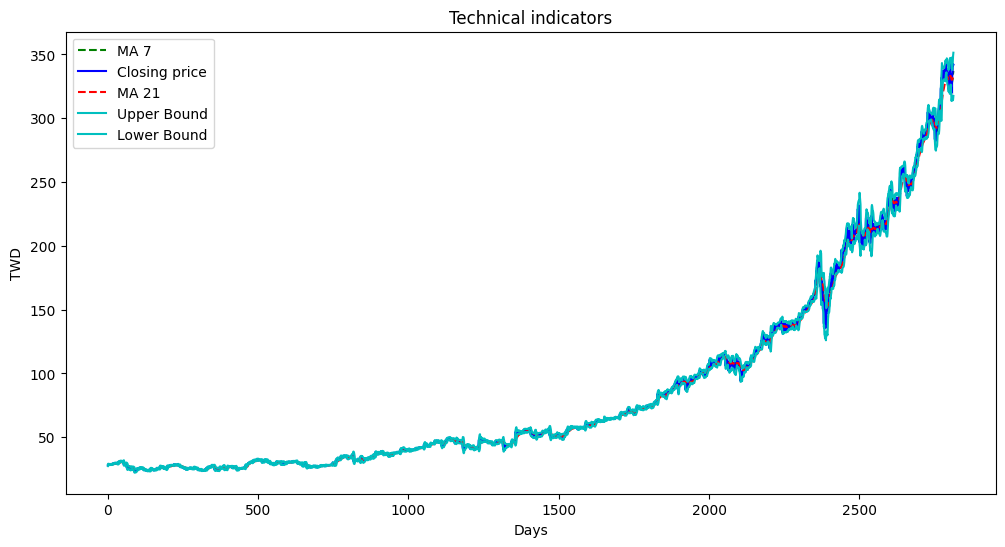

In [32]:
x_ = np.arange(data_combine.shape[0])
plt.figure(figsize=(12, 6))
plt.plot(data_combine['7ma'].values, label = 'MA 7', color = 'g', linestyle = '--')
plt.plot(data_combine['Close'].values, label = 'Closing price', color = 'b')
plt.plot(data_combine['21ma'].values, label = 'MA 21', color = 'r', linestyle = '--')
plt.plot(data_combine['7upper'].values, label = 'Upper Bound', color = 'c')
plt.plot(data_combine['7lower'].values, label = 'Lower Bound', color = 'c')
plt.fill_between(x_, data_combine['7lower'].values, data_combine['7upper'].values, alpha = 0.35)
plt.title('Technical indicators')
plt.ylabel('TWD')
plt.xlabel('Days')
plt.legend()


<ipython-input-33-daf186f24988>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_combine[f'FT_{num_}components'] = np.fft.ifft(fft_list_m10)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
<ipython-input-33-daf186f24988>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_combine[f'FT_{num_}components'] = np.fft.ifft(fft_list_m10)
/usr/local/lib/python3.10/dist-package

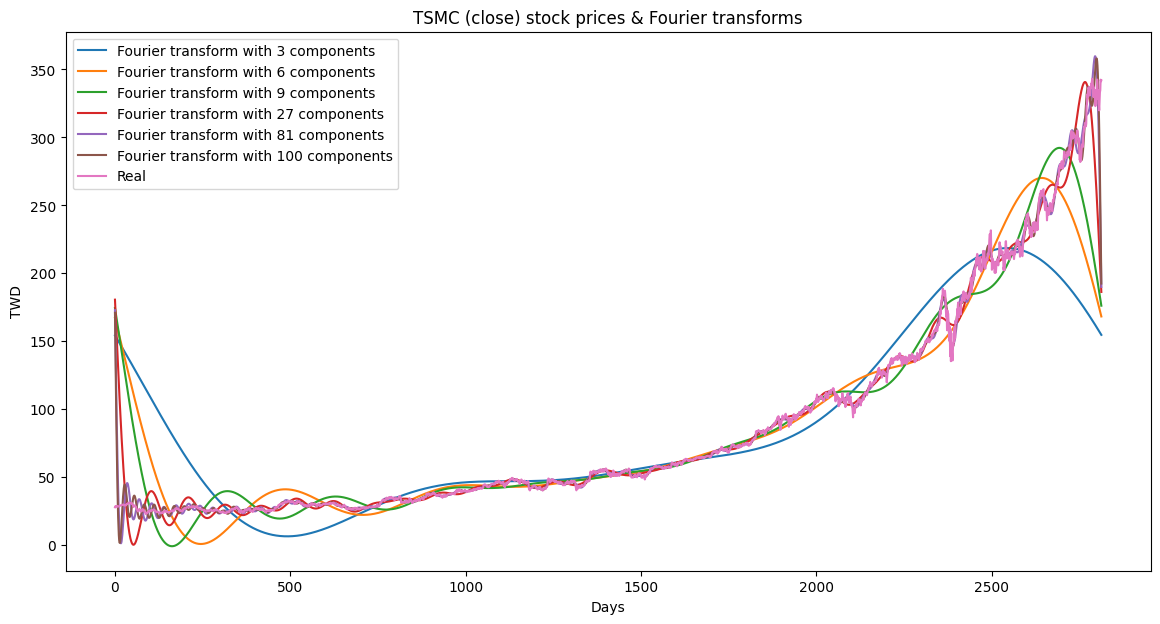

In [33]:
close_fft = np.fft.fft(np.asarray(data_combine['Close'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

plt.figure(figsize=(14, 7), dpi=100)
fft_list = np.asarray(fft_df['fft'].tolist())
for num_ in [3, 6, 9, 27, 81, 100]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_] = 0
    data_combine[f'FT_{num_}components'] = np.fft.ifft(fft_list_m10)
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
plt.plot(data_combine['Close'].values,  label='Real')
plt.xlabel('Days')
plt.ylabel('TWD')
plt.title('TSMC (close) stock prices & Fourier transforms')
plt.legend()
plt.show()

In [34]:
data_combine['FT_3components'] = data_combine['FT_3components'].astype('float')
data_combine['FT_6components'] = data_combine['FT_6components'].astype('float')
data_combine['FT_9components'] = data_combine['FT_9components'].astype('float')
data_combine['FT_27components'] = data_combine['FT_27components'].astype('float')
data_combine['FT_81components'] = data_combine['FT_81components'].astype('float')
data_combine['FT_100components'] = data_combine['FT_100components'].astype('float')
data_combine.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
<ipython-input-34-4c509cee5b72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_combine['FT_3components'] = data_combine['FT_3components'].astype('float')
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
<ipython-input-34-4c509cee5b72>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,Open,High,Low,Close,Adj Close,Volume,pct_change,log_change,7ma,14ma,...,S&P500,Japan225,KoreanIndex,NASDQ,FT_3components,FT_6components,FT_9components,FT_27components,FT_81components,FT_100components
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-10,28.030001,28.240000,27.840000,27.990000,21.152485,48591300,-0.000714,-0.000714,28.146893,28.549826,...,1068.13,9963.99,1570.12,2147.87,154.354910,167.290639,174.546314,180.673782,172.971193,171.012076
2010-02-22,28.840000,28.940001,28.650000,28.730000,21.813240,36707100,-0.001390,-0.001391,28.574012,28.565252,...,1108.01,10400.47,1627.10,2242.03,153.927626,166.244162,172.853763,174.978117,155.958916,149.642177
2010-02-23,28.680000,28.830000,28.090000,28.330000,21.509546,52266200,-0.013923,-0.014021,28.513006,28.533674,...,1094.60,10352.10,1628.90,2213.44,153.499577,165.195810,171.157609,169.279583,139.178566,128.763209
2010-02-24,28.520000,28.790001,28.379999,28.629999,21.737316,43165900,0.010589,0.010534,28.542255,28.546592,...,1105.24,10198.83,1612.83,2235.90,153.070772,164.145658,169.458113,163.585385,122.804635,108.716028
2010-02-25,28.270000,28.650000,28.020000,28.600000,21.714542,48735300,-0.001048,-0.001048,28.556692,28.553749,...,1102.94,10101.96,1587.51,2234.22,152.641219,163.093779,167.755537,157.902711,107.004751,89.817016


In [35]:
data_combine.to_csv('./assets/data.csv')